# AeroFit Business Case Study

##### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of
treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team
decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing
appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute
all conditional and marginal probabilities along with their insights/impact on the business.

### Importing libraries

In [51]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

#### Bar plot formate

In [52]:
def show_values_on_bars(axs, h_v="v", space=1):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

### Reading file and preparing window

In [53]:
df = pd.read_csv('Aerofit_treadmill.csv')
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_row', 4000)


### Data parameters

* Product Purchased : KP281, KP481, or KP781
* Age : In years
* Gender : Male/Female
* Education : In years
* MaritalStatus : Single or partnered
* Usage : The average number of times the customer plans to use the treadmill each week.
* Income : Annual income (in USD)
* Fitness : Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* Miles : The average number of miles the customer expects to walk/run each week


### getting starter information

* data shape
* data info
* data head
* data tail
* missing values
* data description
* check duplicates
* drop duplicates
* drop unnecessary columns


In [54]:
cs_name = 'Aerofit case study'
print(f'{cs_name}, shape is {df.shape}')
print()
print()
print(f"{cs_name} basic information")
print()
print(df.info())
print()
print()
print(f"{cs_name} Null value count percentage:")
print()
print(df.isnull().sum(axis=0) / len(df) * 100)
print()
print()
print(f"{cs_name} Description:")
print()
print(df.describe())
print()
print()
print(f"{cs_name} Deep Description:")
print()
print(df.describe(include='object').T)
print()
print()
print(f"{cs_name} Duplicate values:")
print()
print(df.loc[df.duplicated()])

Aerofit case study, shape is (180, 9)


Aerofit case study basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


Aerofit case study Null value count percentage:

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64


Aerofit case study Description:


### Preparing data (adding and modifying columns)

#### Product price according to the models

Product Portfolio
* The KP481 is for mid-level runners that sell for \$ 1,750.
* The KP281 is an entry-level treadmill that sells for \$ 1,500.
* The KP781 treadmill is having advanced features that sell for \$ 2,500.


In [55]:
product_price = pd.DataFrame({
 "Product":["KP281","KP481","KP781"],
 "Product_price":[1500,1750,2500]
 })

product_price

,Product,Product_price
0,KP281,1500
1,KP481,1750
2,KP781,2500


#### merging product prices in AeroFit data

In [56]:
df = df.merge(product_price, on="Product", how="left")

#### fitness by category

In [57]:
df["Fitness_category"] = df['Fitness']

In [58]:
df["Fitness_category"].replace({1:"Poor Shape",
 5:"Excellent Shape",
4:"Good Shape",
3:"Average Shape",
2:"Bad Shape"},inplace=True)

#### Miles per day of usage

In [59]:
df['Miles per 1 use'] = df['Miles']/df['Usage']

### getting starter information after pre-processing the data

* data shape
* data info
* data head
* data tail
* missing values
* data description
* check duplicates
* drop duplicates
* drop unnecessary columns


In [60]:
cs_name = 'Aerofit case study'
print(f'{cs_name}, shape is {df.shape}')
print()
print()
print(f"{cs_name} basic information")
print()
print(df.info())
print()
print()
print(f"{cs_name} Null value count percentage:")
print()
print(df.isnull().sum(axis=0) / len(df) * 100)
print()
print()
print(f"{cs_name} Description:")
print()
print(df.describe())
print()
print()
print(f"{cs_name} Deep Description:")
print()
print(df.describe(include='object').T)
print()
print()
print(f"{cs_name} Duplicate values:")
print()
print(df.loc[df.duplicated()])

Aerofit case study, shape is (180, 12)


Aerofit case study basic information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           180 non-null    object 
 1   Age               180 non-null    int64  
 2   Gender            180 non-null    object 
 3   Education         180 non-null    int64  
 4   MaritalStatus     180 non-null    object 
 5   Usage             180 non-null    int64  
 6   Fitness           180 non-null    int64  
 7   Income            180 non-null    int64  
 8   Miles             180 non-null    int64  
 9   Product_price     180 non-null    int64  
 10  Fitness_category  180 non-null    object 
 11  Miles per 1 use   180 non-null    float64
dtypes: float64(1), int64(7), object(4)
memory usage: 18.3+ KB
None


Aerofit case study Null value count percentage:

Product             0.0
Age            

##### Observation:

* Median Age of Customer is 26 years
* Top selling product is KP281 with highest number of unites sold(80)
* Maximum users are Married Men.
* Average fitness level of the customers is 3
* Average miles for give cutomers' is 94 Miles
* Average income of the customers is \$ 50596.5.
* On an average, customers us the tredmill 3 days per week.
* Highest mile covered in a single use by a customer is 90. (and after a deep analysis we found out, that its a Male customer)


## Customer Analysis

### Gender distribution of customers

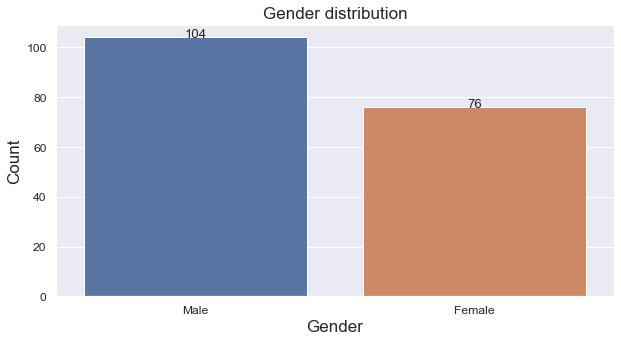

In [61]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(10,5))
types = sns.countplot(data = df , x = "Gender") 
plt.xlabel("Gender", fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.title("Gender distribution",fontdict ={"fontsize": 17})
show_values_on_bars(types,h_v="v",space=1)

### Marital Status based Customer distribution

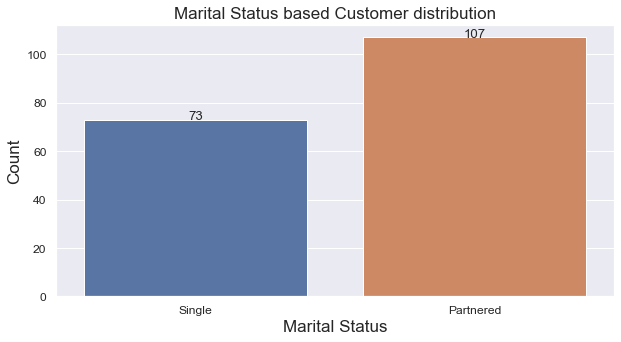

In [62]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(10,5))
types = sns.countplot(data = df , x = "MaritalStatus")
plt.xlabel("Marital Status", fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.title("Marital Status based Customer distribution",fontdict ={"fontsize": 17})
show_values_on_bars(types,h_v="v",space=1)

### Age distribution

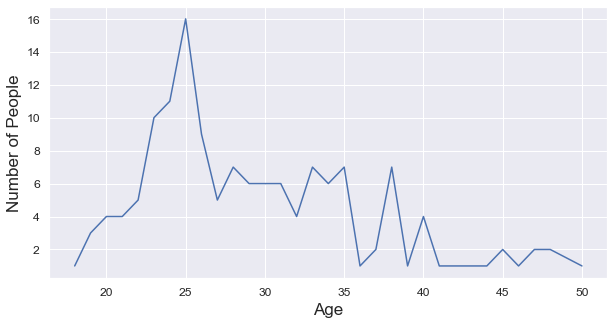

In [63]:
age_group_df = df.groupby(['Age'])['Income'].nunique().reset_index()
plt.figure(figsize=(10,5))
sns.set(font_scale = 1.1)
types = sns.lineplot(data = age_group_df , x = "Age", y="Income")
plt.xlabel("Age", fontsize=17)
plt.ylabel("Number of People",fontsize=17)
show_values_on_bars(types,h_v="v",space=1)


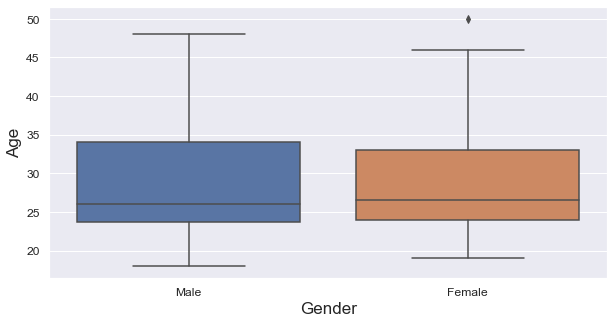

In [64]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(10,5))
plt.xlabel("Gender",fontsize=17)
plt.ylabel("Age",fontsize=17)
sns.boxplot(x= 'Gender', y='Age', data=df)
plt.show()

### Miles based cutsomers distribution

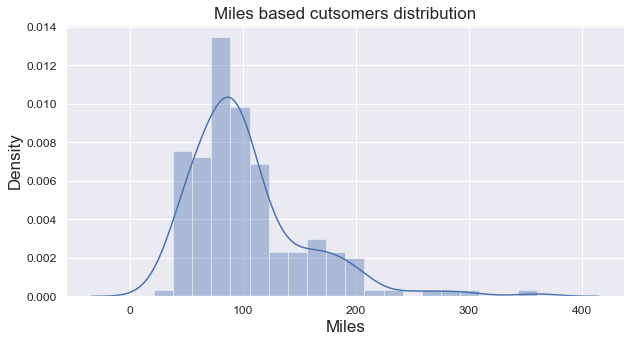

In [65]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(10,5))
plt.xlabel("Gender",fontsize=17)
plt.ylabel("Density",fontsize=17)
sns.distplot(df["Miles"])
plt.title("Miles based cutsomers distribution",fontdict ={"fontsize": 17})
plt.show()

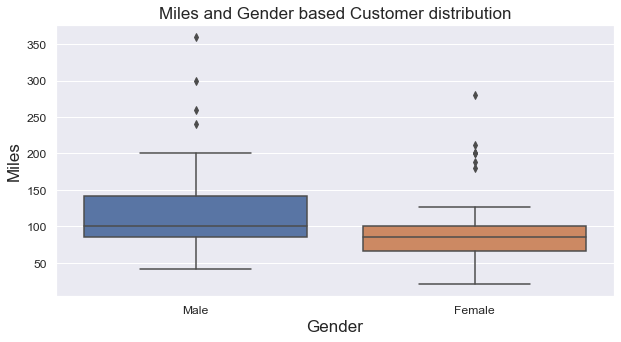

In [66]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(10,5))
plt.xlabel("Gender",fontsize=17)
plt.ylabel("Miles",fontsize=17)
sns.boxplot(x= 'Gender', y='Miles', data=df)
plt.title("Miles and Gender based Customer distribution",fontdict ={"fontsize": 17})
plt.show()

### Checking for Outliers in Miles

In [67]:
IQR = np.percentile(df["Miles"],75) - np.percentile(df["Miles"],25)
Q3 = np.percentile(df["Miles"],75)
Q1 = np.percentile(df["Miles"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker

print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")

outlier_data = df[df["Miles"]>UpperWhisker]
print("Outliers : ",len(outlier_data))

print()
print("Customers who run more than 187.875 (outliers).")
outlier_data["Product"].value_counts()


Q1 = 66.0, Q3 = 114.75, IQR = 48.75
Outliers :  13

Customers who run more than 187.875 (outliers).


KP781    11
KP281     1
KP481     1
Name: Product, dtype: int64

### Income based Gender distribution

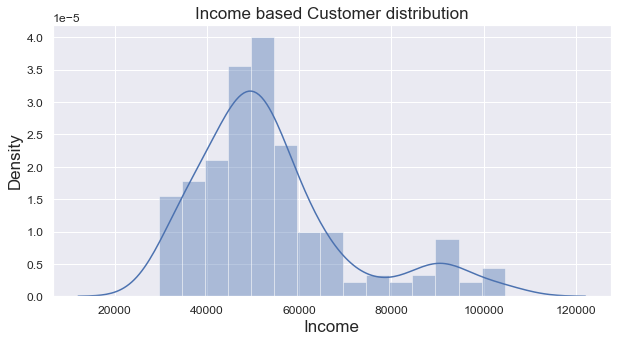

In [68]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(10,5))
plt.xlabel("Gender",fontsize=17)
plt.ylabel("Density",fontsize=17)
sns.distplot(df["Income"])
plt.title("Income based Customer distribution",fontdict ={"fontsize": 17})
plt.show()

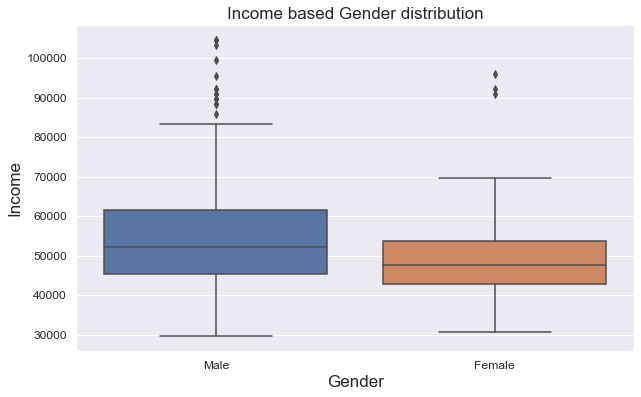

In [69]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(10,6))
plt.xlabel("Gender",fontsize=17)
plt.ylabel("Income",fontsize=17)
sns.boxplot(x= 'Gender', y='Income', data=df)
plt.title("Income based Gender distribution",fontdict ={"fontsize": 17})
plt.show()

### Checking for Outliers in customer Income

In [70]:
IQR = np.percentile(df["Income"],75)-np.percentile(df["Income"],25)
Q3 = np.percentile(df["Income"],75)
Q1 = np.percentile(df["Income"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker
print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
(df["Income"] > UpperWhisker).value_counts()

Q1 = 44058.75, Q3 = 58668.0, IQR = 14609.25


False    161
True      19
Name: Income, dtype: int64

##### Observation:
* there are 19 customers, who have Income way above the other customers in the data

## Product Analysis

### Product distribution

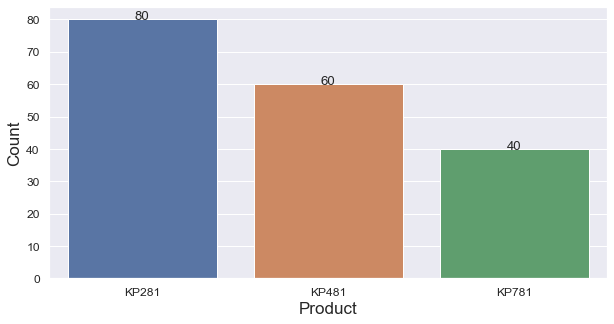

In [71]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(10,5))
types = sns.countplot(data = df , x = "Product")
plt.xlabel("Product", fontsize=17)
plt.ylabel("Count",fontsize=17)
show_values_on_bars(types,h_v="v",space=1)

### Revenue base product distribution

In [72]:
product_revenue = df.groupby(['Product'])['Product_price'].sum().reset_index().rename(columns=
                                                                                      {'Product':"Product", 
                                                                                       "Product_price":'Product_revenue'})

product_revenue

,Product,Product_revenue
0,KP281,120000
1,KP481,105000
2,KP781,100000


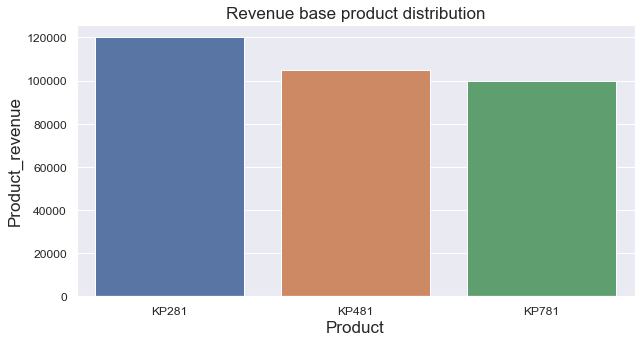

In [73]:
sns.set(font_scale = 1.1)
plt.figure(figsize=(10,5))
plt.xlabel("Product",fontsize=17)
plt.ylabel("Product Revenue",fontsize=17)
sns.barplot(x= 'Product', y='Product_revenue', data= product_revenue)
plt.title("Revenue base product distribution",fontdict ={"fontsize": 17})
plt.show()

##### Observation:

* KP281 is the top selling product and KP781 is the lowest selling product
* KP281 is the highest revenue generating product
* unlike the huge diffrence in number of product sold between KP481 and KP781 which was 20 (33%), the diffrence betwwen thier revenue is only 5000 USD (4%)


## Analysis using Multiple factors 

### Gender based product distribution

In [79]:
pd.crosstab(df['Product'], df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


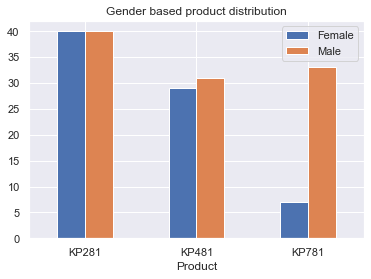

In [80]:
pd.crosstab(df['Product'], df['Gender']).plot(kind="bar", stacked=False, rot=0)
plt.title("Gender based product distribution")
plt.legend()
plt.show()

In [81]:
(pd.crosstab(df['Product'], df['Gender'], margins=True)/180)*100

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


#### Observation

* Gender distribution in KP281 is equal 22.22%
* In KP481, percentage of Male customers are by 1.1%. 
* in PK781, percentage of Male customers are by 14.5%. And from this we can say that, when it comes to KP781, its the least favorite product of Female customers and on the other hand 2nd most sold product for Male cutsomers.

* Marginal Probability for each product is: 
                                            KP281 = 44.4 %
                                            KP481 = 33.3 %
                                            KP781 = 22.2 %
                                            
* Marginal Probability for each Gender is:  
                                            Male = 57.7 %
                                            Female = 42.2 %
                                           


In [82]:
print("Probability that a perticual gender will buy a perticular product shown below:")

(pd.crosstab(df['Product'], df['Gender'], margins=True, normalize='columns'))*100

Probability that a perticual gender will buy a perticular product shown below:


Gender,Female,Male,All
Product,,,
KP281,52.631579,38.461538,44.444444
KP481,38.157895,29.807692,33.333333
KP781,9.210526,31.730769,22.222222


##### Observation:

* When it comes to KP281 and KP481, it is more likely that a Female customer will buy it. And KP781 on the other hand is more in demand with Male customers as compare to the Female cutomers for that same product.


### Marital status based product diestribution

In [83]:
pd.crosstab(df['Product'],df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


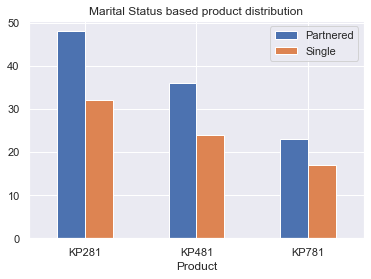

In [84]:
pd.crosstab(df['Product'],df['MaritalStatus']).plot(kind="bar", stacked=False, rot=0)
plt.title("Marital Status based product distribution")
plt.legend()
plt.show()

In [85]:
(pd.crosstab(df['Product'],df['MaritalStatus'], margins=True)/180)*100

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.666667,17.777778,44.444444
KP481,20.000000,13.333333,33.333333
KP781,12.777778,9.444444,22.222222
All,59.444444,40.555556,100.000000


In [86]:
pd.crosstab(df['Product'],[df['MaritalStatus'],df['Gender']], margins=True)

MaritalStatus Partnered      Single       All
Gender           Female Male Female Male     
Product                                      
KP281                27   21     13   19   80
KP481                15   21     14   10   60
KP781                 4   19      3   14   40
All                  46   61     30   43  180

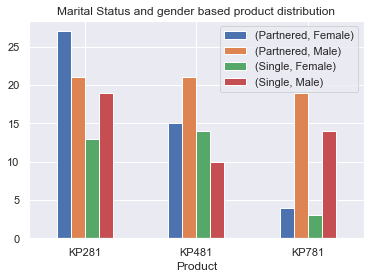

In [87]:
pd.crosstab(df['Product'],[df['MaritalStatus'],df['Gender']]).plot(kind="bar", stacked=False, rot=0)
plt.title("Marital Status and gender based product distribution")
plt.legend()
plt.show()

##### Obsrvation:

* Marginal Probability for   
        Married Customers : 59.44 %
        Single Customers : 40.555 %

* there is a 18.9% higher chance of a cutomer being partnered as compare to being single.
* KP281 is most popular among Partnered Females
* KP481 is most popular among Partnered Males
* KP781 is most popular among Partnered Males


In [88]:
print('Probability of a customer being single or partnered according to the perticular product they perchase is given below')

(pd.crosstab(df['Product'],df['MaritalStatus'], margins=True, normalize='columns'))

Probability of a customer being single or partnered according to the perticular product they perchase is given below


MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.448598,0.438356,0.444444
KP481,0.336449,0.328767,0.333333
KP781,0.214953,0.232877,0.222222


### Education based Product distribution

In [89]:
pd.crosstab(df['Education'], df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Education,,,,
12,2,1,0,3
13,3,2,0,5
14,30,23,2,55
15,4,1,0,5
16,39,31,15,85
18,2,2,19,23
20,0,0,1,1
21,0,0,3,3
All,80,60,40,180


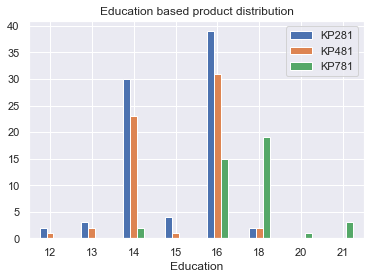

In [90]:
pd.crosstab(df['Education'], df['Product']).plot(kind="bar", stacked=False, rot=0)
plt.title("Education based product distribution")
plt.legend()
plt.show()

##### Observation:

* Product KP281 and KP481 is more popular among cutomers who have education between 14 to 16
* product KP781 is purchased by customers of education 16 and above.

* This is because Education and Income have a positive and high correlation, and Product price and Income also have a positive and high correlation. That is the main reason KP781 which is a higher varient of the tredmill with higher price is so popular because of the high income of the customers.


### Usage based product distribution

In [91]:
pd.crosstab(df['Usage'], df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Usage,,,,
2,19,14,0,33
3,37,31,1,69
4,22,12,18,52
5,2,3,12,17
6,0,0,7,7
7,0,0,2,2
All,80,60,40,180


In [92]:
pd.crosstab(df['Usage'], df['Product'], normalize='columns')*100

Product,KP281,KP481,KP781
Usage,,,
2,23.75,23.333333,0.0
3,46.25,51.666667,2.5
4,27.50,20.000000,45.0
5,2.50,5.000000,30.0
6,0.00,0.000000,17.5
7,0.00,0.000000,5.0


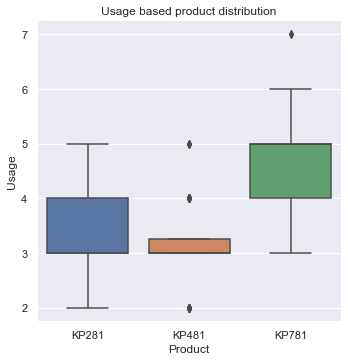

In [93]:
sns.catplot(x='Product', y='Usage', kind="box", data=df)
plt.title("Usage based product distribution")
plt.show()

##### Observation:
* customers who use tredmill 6 to 7 days per week is most likely to use KP781
* KP281 and KP481 users are the ones who use thier tredmill 2 to 4 days per week.

### Fitness based product distribution

In [94]:
pd.crosstab(df['Fitness_category'], df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Fitness_category,,,,
Average Shape,54,39,4,97
Bad Shape,14,12,0,26
Excellent Shape,2,0,29,31
Good Shape,9,8,7,24
Poor Shape,1,1,0,2
All,80,60,40,180


In [95]:
pd.crosstab(df['Fitness_category'], df['Product'], normalize='columns')*100

Product,KP281,KP481,KP781
Fitness_category,,,
Average Shape,67.50,65.000000,10.0
Bad Shape,17.50,20.000000,0.0
Excellent Shape,2.50,0.000000,72.5
Good Shape,11.25,13.333333,17.5
Poor Shape,1.25,1.666667,0.0


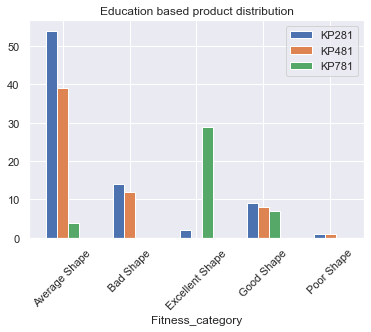

In [96]:
pd.crosstab(df['Fitness_category'], df['Product']).plot(kind="bar", stacked=False, rot=45)
plt.title("Education based product distribution")
plt.legend()
plt.show()

##### Observation:
* if the person is in excellent shape , the probabiliy that he is using KP781 is more than 70%.


### Gender wise Miles per use

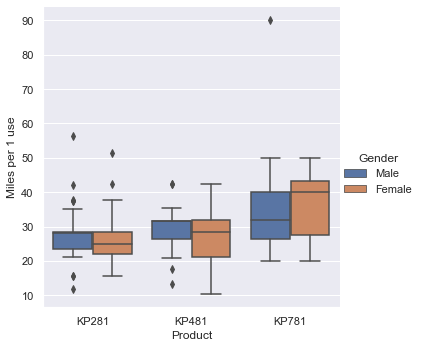

In [97]:
sns.catplot(x= "Product", y = "Miles per 1 use",hue="Gender" ,kind = "box", data=df, )
plt.show()

##### Observation:
* Female Customers who are running average 40 miles/usage (extensive exercise) , are using product KP781, which is higher than Male average using same product.
* KP781 can be recommended for Female customers who exercises extensively.
* Males customers who are running average of 28 miles/usage (average exercise) , are using product KP281 .
* Males customers who are running average of 32 miles/usage (average exercise) , are using product KP481 . and for female average running for same product is 28 miles/usage.


### Ftiness category analysis

In [98]:
pd.crosstab(index=[df["Product"],df["Fitness_category"]],columns=df["Gender"])


Gender                    Female  Male
Product Fitness_category              
KP281   Average Shape         26    28
        Bad Shape             10     4
        Excellent Shape        1     1
        Good Shape             3     6
        Poor Shape             0     1
KP481   Average Shape         18    21
        Bad Shape              6     6
        Good Shape             4     4
        Poor Shape             1     0
KP781   Average Shape          1     3
        Excellent Shape        5    24
        Good Shape             1     6

In [99]:
df[df['Miles per 1 use']>40]['Fitness_category'].value_counts()

Excellent Shape    9
Average Shape      7
Good Shape         3
Name: Fitness_category, dtype: int64

In [100]:
df[df['Miles per 1 use']>np.percentile(df['Miles per 1 use'],95)]['Fitness_category'].value_counts()

Excellent Shape    7
Average Shape      2
Name: Fitness_category, dtype: int64

In [101]:
pd.crosstab([df["Product"],df["Gender"]],df["Fitness"],margins=True)

Fitness         1   2   3   4   5  All
Product Gender                        
KP281   Female  0  10  26   3   1   40
        Male    1   4  28   6   1   40
KP481   Female  1   6  18   4   0   29
        Male    0   6  21   4   0   31
KP781   Female  0   0   1   1   5    7
        Male    0   0   3   6  24   33
All             2  26  97  24  31  180

##### Observation:
* Mejority of customers who are in Excellent shape, uses KP781
* Mejority of customers who are in Average shape, uses KP281
* combined fitness level of Male and Female customers who uses KP281 is equal.
* Mles customers who uses KP781 is the second highest group of people in fitness category.

### Miles based Product distribution

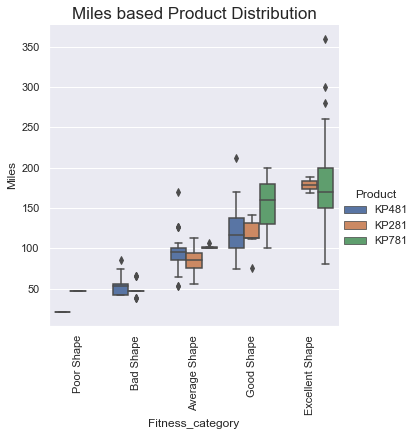

In [102]:
sns.catplot(x= "Fitness_category", y = "Miles" ,kind = "box",hue="Product", data= df.sort_values(by="Fitness"))
plt.xticks(rotation = 90)
plt.title("Miles based Product Distribution",fontdict ={"fontsize": 17})
plt.show()


##### Observation:
* People who run/walk more miles(>130) , are more likely to use KP781 product.
* People who walk/run around 60 to 130 miles are more likely to use KP281 and KP481 products.

### correlations between all features

In [103]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles,Product_price,Miles per 1 use
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.029263,0.012678
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.563463,0.069552
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.623124,0.156523
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.696616,0.557926
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.695847,0.267164
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.643923,0.734778
Product_price,0.029263,0.563463,0.623124,0.696616,0.695847,0.643923,1.000000,0.337825
Miles per 1 use,0.012678,0.069552,0.156523,0.557926,0.267164,0.734778,0.337825,1.000000


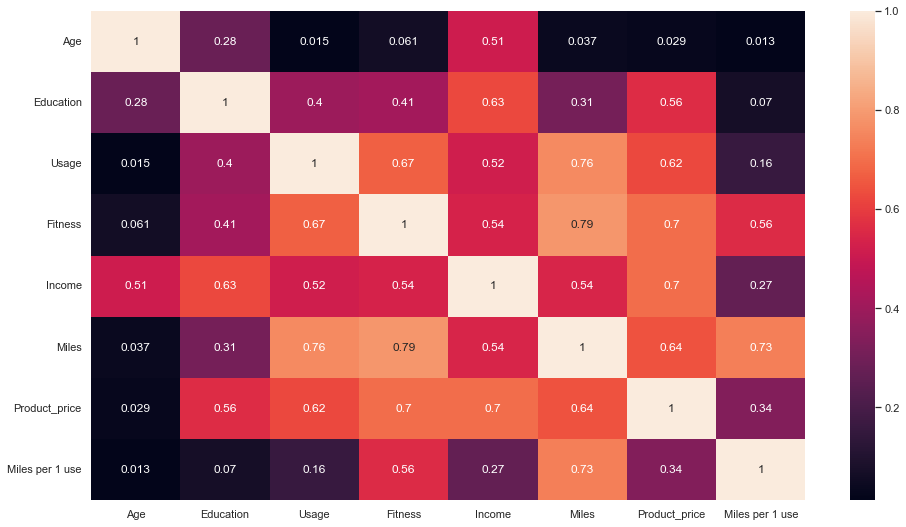

In [104]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### correlation : >0.6

In [105]:
print(df.corr().unstack()[(df.corr().unstack()>0.65) & (df.corr().unstack()!=1)])

Usage            Fitness            0.668606
                 Miles              0.759130
Fitness          Usage              0.668606
                 Miles              0.785702
                 Product_price      0.696616
Income           Product_price      0.695847
Miles            Usage              0.759130
                 Fitness            0.785702
                 Miles per 1 use    0.734778
Product_price    Fitness            0.696616
                 Income             0.695847
Miles per 1 use  Miles              0.734778
dtype: float64


##### Observation:

* Fitness and Miles have a positive and a very high correlation: 0.79
* Product price and Income have a positive and a very high correlation: 0.7

In [106]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_price,Fitness_category,Miles per 1 use
0,KP281,18,Male,14,Single,3,4,29562,112,1500,Good Shape,37.333333
1,KP281,19,Male,15,Single,2,3,31836,75,1500,Average Shape,37.500000
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,Average Shape,16.500000
3,KP281,19,Male,12,Single,3,3,32973,85,1500,Average Shape,28.333333
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,Bad Shape,11.750000


In [ ]:
d = df[["Age","Education","Fitness","Income","Miles","Gender"]]

x = sns.pairplot(d, kind = "reg", hue="Gender")
x.map_diag(sns.kdeplot)
plt.show()


"""
### From observations 1 to 12, we can make a customer profile for particular products:

#### KP281 : 
* Most affordable and entry level and Maximum Selling Product. 
* This model popular amongst both Male and Female customers 
* Same number of Male and Female customers. 
* Customers walk/run average 70 to 90 miles on this product. 
* Customers use 3 to 4 times a week 
* Fitness Level of this product users is Average Shape. 
* More general purpose for all age group and fitness levels.
#### KP481 : 
* Intermediate Price Range 
* Fitness Level of this product users varies from Bad to Average Shape depending on their usage. 
* Customers prefer KP481 model to use less frequent but to run more miles per week on this. 
* Customer walk/run average 70 to 130 or more miles per week on his product. 
* has higher probability of selling for female customers. 
* Probability of Female customer buying KP481 is significantly higher than male. 
* KP481 product is specifically recommended for Female customers who are intermediate user. 
* customers are from adult, teen and mid-age categories.
#### KP781 : 
* least sold product. 
* high price and preferred by customers who does exercises more extensively and run more miles. 
* Customer walk/run average 120 to 200 or more miles per week on his product. 
* Customers use 4 to 5 times a week at least. 
* If person is in Excellent Shape , the probability that he is using KP781 is more than 90%. 
* Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product. 
* KP781 can be recommended for Female customers who exercises extensively. 
* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%). 
* Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more. 
* most of old people who are above 45 age and adult uses this product.

## Recommendations : 
* Recommend KP781 product to users who exercises/run more frequently and run more and more miles , and have high income. Since Kp781 is least selling product (22.2% share of all the products) , recommend this product some customers who exercise at intermediate to extensive level , if they are planning to go for KP481. Also the targeted Age Category is Adult and age above 45. 
* Recommend KP481 product specifically for female customers who run/walk more miles , as data shows their probability is higher. Statistical Summery about fitness level and miles for KP481 is not good as KP281 which is cheaper product. Possibly because of price, customers prefer to purchase KP281. It is recommended to make some necessary changes to product K481 to increase customer experience. 
"""